In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import matplotlib.pylab as mpl
import seaborn as sns

from IPython.display import display

from functools import partial

from utils.multi_processing_functions import *
from utils.cluster_permutation import *

PLOT_PATH = './plots_grasp_aligned_fixations_final/'
sns.set(
    context="talk",
    style="ticks",
    palette="muted",
    rc={'font.weight':'light'}    
)

In [2]:
import multiprocessing as mp

def pandas_mp_apply(grouped_df, apply_func):
    with mp.Pool(mp.cpu_count() - 1) as p:
        ret_list = p.map(apply_func, [(group, name) for name, group in grouped_df])
    return pd.concat(ret_list)

In [3]:
samples_df = pd.read_csv(
    '../processed_data/EIH_1/06_ET_cleaned.csv',
    parse_dates = ['timestamp_dt'],
    dtype = {
        'is_fixation': np.bool, 'grasp_onset_bool': np.bool,'grasp_end_bool': np.bool,
#         'subjectID': 'int32', 'trial_num': 'int32', 'trialID': 'int32',
    },
    index_col=False,
)
samples_df.head()

C:\Users\akeshava\.conda\envs\conda_ergovr\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


,subject_id,trial_num,trial_type,timestamp_dt,is_fixation,eye_hit,grasp,grasp_onset_bool,eye_shelf_hit,fix_duration,grasp_end_bool,grasp_duration,is_outlier_fixation,pickup_location,drop_location
0,2006.0,2.0,hard,1970-01-01 00:00:00.351460844,True,Other,NaN,False,2_4,0.122589,False,0.0,False,NaN,NaN
1,2006.0,2.0,hard,1970-01-01 00:00:00.360775739,True,Other,NaN,False,2_4,0.122589,False,0.0,False,NaN,NaN
2,2006.0,2.0,hard,1970-01-01 00:00:00.371934354,False,Other,NaN,False,2_4,0.077499,False,0.0,False,NaN,NaN
3,2006.0,2.0,hard,1970-01-01 00:00:00.383572042,False,Other,NaN,False,2_4,0.077499,False,0.0,False,NaN,NaN
4,2006.0,2.0,hard,1970-01-01 00:00:00.394215554,False,Other,NaN,False,2_4,0.077499,False,0.0,False,NaN,NaN


In [4]:
    samples_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6757742 entries, 0 to 6757741
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   subject_id           float64       
 1   trial_num            float64       
 2   trial_type           object        
 3   timestamp_dt         datetime64[ns]
 4   is_fixation          bool          
 5   eye_hit              object        
 6   grasp                object        
 7   grasp_onset_bool     bool          
 8   eye_shelf_hit        object        
 9   fix_duration         float64       
 10  grasp_end_bool       bool          
 11  grasp_duration       float64       
 12  is_outlier_fixation  bool          
 13  pickup_location      object        
 14  drop_location        object        
dtypes: bool(4), datetime64[ns](1), float64(4), object(6)
memory usage: 592.9+ MB


In [5]:
print(f'Number of Subjects: {samples_df.subject_id.nunique()}')


Number of Subjects: 48


In [6]:
# in seconds
bin_size = 0.25
offset_start = -2
offset_stop = 2

grp_cols = ['subject_id', 'trial_num']
grasp_epochs_df = (
    pandas_mp_apply(
        samples_df
        .groupby(grp_cols),
        partial(get_epoch_grasp_on, offset_start=offset_start, offset_stop=offset_stop, bin_size=bin_size)
    )
)
grasp_epochs_df.head()

timestamp_dt  \
subject_id trial_num trial_type grasp_num                                 
2006.0     2.0       hard       1         1970-01-01 00:01:18.811744690   
                                1         1970-01-01 00:01:18.823097229   
                                1         1970-01-01 00:01:18.834075928   
                                1         1970-01-01 00:01:18.845115662   
                                1         1970-01-01 00:01:18.856224060   

                                           is_fixation         eye_hit  \
subject_id trial_num trial_type grasp_num                                
2006.0     2.0       hard       1                 True  Cylinder_Green   
                                1                 True  Cylinder_Green   
                                1                 True  Cylinder_Green   
                                1                 True  Cylinder_Green   
                                1                 True  Cylinder_Green   

                                          eye_shelf_hit current_TO_fix  \
subject_id trial_num trial_type grasp_num                                
2006.0     2.0       hard       1                   5_1           True   
                                1                   5_1           True   
                                1                   5_1           True   
                                1                   5_1           True   
                                1                   5_1           True   

                                          current_TS_fix prev_TO_fix  \
subject_id trial_num trial_type grasp_num                              
2006.0     2.0       hard       1                    NaN       False   
                                1                    NaN       False   
                                1                    NaN       False   
                                1                    NaN       False   
                                1                    NaN       False   

                                          prev_TS_fix next_TO_fix next_TS_fix  \
subject_id trial_num trial_type grasp_num                                       
2006.0     2.0       hard       1                 NaN       False         NaN   
                                1                 NaN       False         NaN   
                                1                 NaN       False         NaN   
                                1                 NaN       False         NaN   
                                1                 NaN       False         NaN   

                                          other_fix    grasp_object  \
subject_id trial_num trial_type grasp_num                             
2006.0     2.0       hard       1             False  Cylinder_Green   
                                1             False  Cylinder_Green   
                                1             False  Cylinder_Green   
                                1             False  Cylinder_Green   
                                1             False  Cylinder_Green   

                                                             grasp_time  \
subject_id trial_num trial_type grasp_num                                 
2006.0     2.0       hard       1         1970-01-01 00:01:20.811264038   
                                1         1970-01-01 00:01:20.811264038   
                                1         1970-01-01 00:01:20.811264038   
                                1         1970-01-01 00:01:20.811264038   
                                1         1970-01-01 00:01:20.811264038   

                                                              drop_time  \
subject_id trial_num trial_type grasp_num                                 
2006.0     2.0       hard       1         1970-01-01 00:01:25.854011536   
                                1         1970-01-01 00:01:25.854011536   
                                1         1970-01-01 00:01:25.854011536   
                       

In [7]:
grp_cols = ['subject_id',  'trial_type', 'trial_num',]
avg_fixations_df = (
    pandas_mp_apply(
        grasp_epochs_df.query('is_fixation == 1').groupby(grp_cols),
        get_avg_fixations_time_binned,
    )
)
avg_fixations_df.head()

current_TO_fix_count  \
subject_id trial_num trial_type time_bin                        
2006.0     5.0       easy       -1.75                      27   
                                -1.5                       35   
                                -1.25                      26   
                                -1.0                       32   
                                -0.75                      91   

                                          total_object_fix_count  \
subject_id trial_num trial_type time_bin                           
2006.0     5.0       easy       -1.75                        201   
                                -1.5                         178   
                                -1.25                        156   
                                -1.0                         151   
                                -0.75                        156   

                                         current_TS_fix_count  \
subject_id trial_num trial_type time_bin                        
2006.0     5.0       easy       -1.75                       6   
                                -1.5                        0   
                                -1.25                       0   
                                -1.0                       14   
                                -0.75                       0   

                                          total_shelf_fix_count  \
subject_id trial_num trial_type time_bin                          
2006.0     5.0       easy       -1.75                       201   
                                -1.5                        178   
                                -1.25                       156   
                                -1.0                        151   
                                -0.75                       156   

                                         prev_TO_fix_count prev_TS_fix_count  \
subject_id trial_num trial_type time_bin                                       
2006.0     5.0       easy       -1.75                   41                40   
                                -1.5                    30                17   
                                -1.25                   36                34   
                                -1.0                    16                29   
                                -0.75                   17                15   

                                         next_TO_fix_count next_TS_fix_count  \
subject_id trial_num trial_type time_bin                                       
2006.0     5.0       easy       -1.75                    2                27   
                                -1.5                     0                27   
                                -1.25                    0                 3   
                                -1.0                     3                 0   
                                -0.75                   29                 0   

                                         other_fix_count  proximity_pick  \
subject_id trial_num trial_type time_bin                                   
2006.0     5.0       easy       -1.75                 60        1.248756   
                                -1.5                  65        1.438202   
                                -1.25                 38        1.422078   
                                -1.0                  35        1.110345   
                                -0.75                 35        0.609272   

                                          proximity_drop current_TO_fix_prop  \
subject_id trial_num trial_type time_bin                                       
2006.0     5.0       easy       -1.75           2.512438            0.134328   
                                -1.5            2.483146            0.196629   
                                -1.25           2.649351            0.166667   
                                -1.0            2.158621            0.211921   
                                -0.75          

In [8]:
avg_fixations_df = avg_fixations_df.query('total_shelf_fix_count >0 or total_object_fix_count>0')


In [9]:
avg_fixations_df.reset_index().to_csv(f'../processed_data/EIH_1/average_fixations_ROI.csv', index=False)

In [9]:
tmpdf = pd.melt(
    avg_fixations_df.reset_index(), 
    id_vars=['subject_id', 'trial_type', 'trial_num', 'time_bin'], 
    value_vars= ['current_TO_fix_prop', 'current_TS_fix_prop', 'prev_TO_fix_prop', 
                 'prev_TS_fix_prop', 'next_TO_fix_prop', 'next_TS_fix_prop', 'other_fix_prop'],
    var_name='Fixation Location', 
    value_name='Proportion'
)

tmpdf['Fixation Location'] = tmpdf['Fixation Location'].map(
    dict(prev_TO_fix_prop='prev TO',
         prev_TS_fix_prop='prev TS',
         current_TO_fix_prop='current TO',
         current_TS_fix_prop='current TS',         
         next_TO_fix_prop='next TO',
         next_TS_fix_prop='next TS',
         other_fix_prop='other',
        )
)

tmpdf.Proportion = tmpdf.Proportion.astype(float)
tmpdf.time_bin = tmpdf.time_bin.astype(float)

(
    tmpdf
    .dropna(subset=['Proportion'])
    .groupby(['subject_id', 'trial_type', 'time_bin', 'Fixation Location'])
    .Proportion
    .mean()
    .reset_index()
)

,subject_id,trial_type,time_bin,Fixation Location,Proportion
0,2006.0,easy,-1.75,current TO,0.132220
1,2006.0,easy,-1.75,current TS,0.058340
2,2006.0,easy,-1.75,next TO,0.013774
3,2006.0,easy,-1.75,next TS,0.039309
4,2006.0,easy,-1.75,other,0.185373
...,...,...,...,...,...
10747,2062.0,hard,2.00,next TO,0.128462
10748,2062.0,hard,2.00,next TS,0.028195
10749,2062.0,hard,2.00,other,0.174721
10750,2062.0,hard,2.00,prev TO,0.031499


In [25]:
tmpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188146 entries, 0 to 188145
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   subject_id         188146 non-null  float64
 1   trial_type         188146 non-null  object 
 2   trial_num          188146 non-null  float64
 3   time_bin           188146 non-null  float64
 4   Fixation Location  188146 non-null  object 
 5   Proportion         188146 non-null  float64
dtypes: float64(4), object(2)
memory usage: 8.6+ MB


In [10]:
cluster_df = pd.DataFrame()

for roi in tmpdf['Fixation Location'].unique():
    
    print(roi)
    curr_roi = tmpdf[tmpdf['Fixation Location']==roi]
    clusters = get_clusters(curr_roi)
    #display(clusters)

    cluster_sizes = get_cluster_period(
        clusters.query('type=="thresh"')[[c for c in clusters.columns if c !="type"]]
    )
    #display(cluster_sizes)
    cluster_sizes = get_cluster_mass(clusters, cluster_sizes.copy()) 
    #display(cluster_sizes)

    n_permutations = 1000
    with mp.Pool(mp.cpu_count() - 1) as p:
        random_cluster = pd.concat(
            p.map(partial(simulate_clusters, df=curr_roi), 
                  range(n_permutations))
        )
    
    for val in cluster_sizes.mass.values:
        
        # print(random_cluster.columns)
        boot_dist = random_cluster.mass
        pvalue = np.min([[np.mean(boot_dist > val), np.mean(boot_dist < val)]])
        cluster_sizes.loc[(cluster_sizes.mass == val), 'pval'] = pvalue
    
    cluster_sizes['ROI'] = roi
    cluster_df = pd.concat([cluster_df, cluster_sizes], ignore_index=True)
    #display(cluster_df)
    


current TO
current TS
prev TO
prev TS
next TO
next TS
other


In [11]:
cluster_df['is_significant'] = False
cluster_df.loc[cluster_df.pval<=0.05/7, 'is_significant'] = True 

In [12]:
cluster_df.to_csv(f'../processed_data/EIH_1/cluster_permutations_fixations_ROI.csv')

In [13]:
cluster_df[cluster_df.is_significant==True]

,col_,time_bin_first,time_bin_last,size,mass,pval,ROI,is_significant
2,trial_type,1.00,1.50,0.50,7.182069,0.0,current TO,True
3,trial_type,-1.75,-1.00,0.75,-12.074294,0.0,current TS,True
4,trial_type,-1.25,-0.75,0.50,8.361107,0.0,prev TO,True
5,trial_type,-0.25,1.00,1.25,-17.573837,0.0,prev TO,True
6,trial_type,1.50,2.00,0.50,-10.387249,0.0,prev TO,True
7,trial_type,-1.75,-1.50,0.25,7.858117,0.0,prev TS,True
9,trial_type,-1.75,-0.25,1.50,-31.140468,0.0,next TO,True
10,trial_type,1.75,2.00,0.25,7.732858,0.0,next TO,True
11,trial_type,-0.50,0.75,1.25,-22.322358,0.0,next TS,True
13,trial_type,1.00,2.00,1.00,-15.038295,0.0,other,True


In [14]:
sns.color_palette('Paired', 10)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509)]

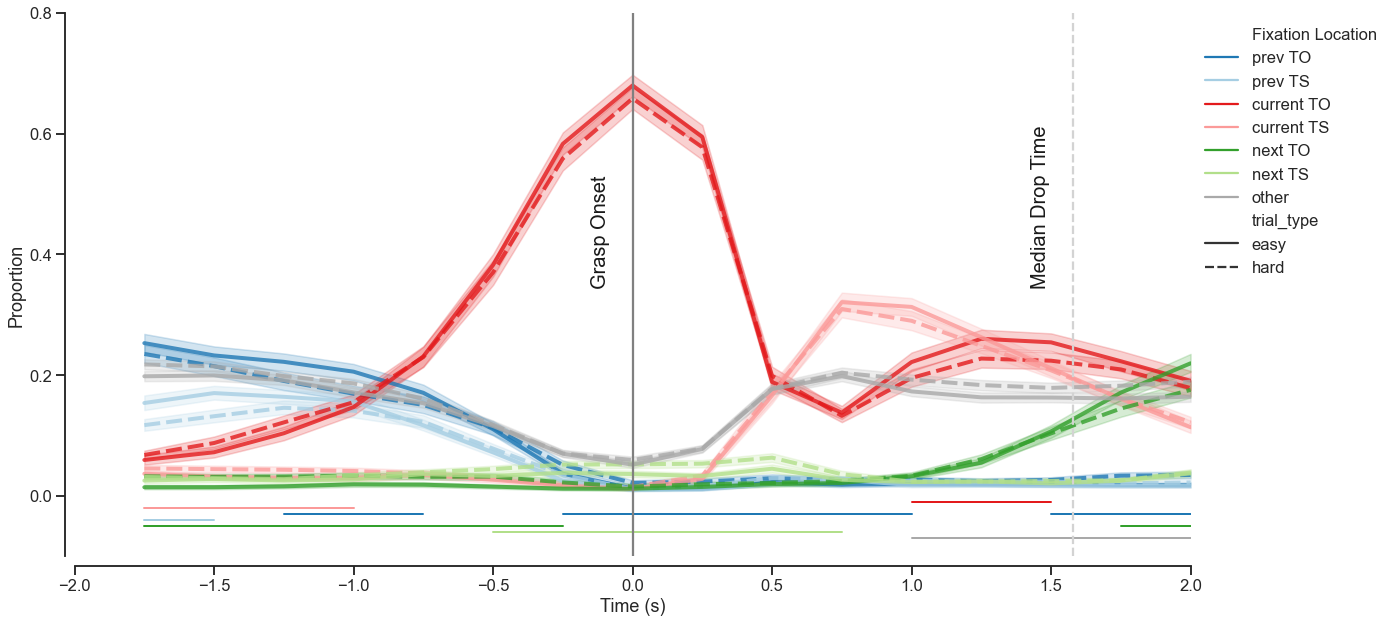

In [15]:

scpt = sns.color_palette('Paired', 10)
sns.set(
    context="talk",
    style="ticks",
    palette="muted",
    rc={'font.weight':'light'}    
)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(
    data=tmpdf,
    x='time_bin', y='Proportion', 
     lw=4,
    hue='Fixation Location',
    hue_order = ['prev TO', 'prev TS', 'current TO', 'current TS', 'next TO', 'next TS', 'other'],
     style='trial_type',
     legend='auto',
    palette=[scpt[1], scpt[0], scpt[5], scpt[4], scpt[3], scpt[2], 'darkgrey'],
    ax=ax,
    alpha=0.8,
     ci=95,
)
sns.despine(offset=10)


pos = 0.75
for idx, row in cluster_df.query('is_significant == True').iterrows():
    
    if row.ROI == 'current TO':
        color=scpt[5]
        pos=-0.01
    elif row.ROI == 'current TS':
        color=scpt[4]
        pos=-0.02
    elif row.ROI == 'prev TO':
        color=scpt[1]
        pos=-0.03
    elif row.ROI == 'prev TS':
        color=scpt[0]
        pos=-0.04
    elif row.ROI == 'next TO':
        color=scpt[3]
        pos=-0.05
    elif row.ROI == 'next TS':
        color=scpt[2]
        pos=-0.06
    elif row.ROI == 'other':
        color='darkgrey'
        pos=-0.07
        
    ax.plot([row['time_bin_first'], row['time_bin_last']], [pos, pos], color=color, lw=2,)
 

ax.axvline(
    (grasp_epochs_df.drop_time - grasp_epochs_df.grasp_time).median() / np.timedelta64(1, 's'),
    color='lightgrey', ls='--',
)
ax.text(
    (grasp_epochs_df.drop_time - grasp_epochs_df.grasp_time).median() 
    / np.timedelta64(1, 's') - 0.15,
    0.35, 'Median Drop Time', {'color': 'k', 'fontsize': 20}, rotation=90,
)
ax.axvline(0, color='grey', ls='-')
ax.text(-0.15, 0.35, 'Grasp Onset', {'color': 'k', 'fontsize': 20}, rotation=90,)

ax.set_xlabel('Time (s)')
ax.set_ylim(-0.1,0.8)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
ax.set_xlim(-2,2)
ax.legend(frameon=False, bbox_to_anchor=(1, 1), ncol=1)

plt.show()

In [20]:
(grasp_epochs_df.drop_time - grasp_epochs_df.grasp_time).median() / np.timedelta64(1, 's')

1.576911927